# PR8-2: Classificatiemodellen in Machine Learning.

Great Outdoors wil graag weten wat de retourredenen gaan zijn op basis van een set onafhankelijke variabelen. Daarom wil zij een model trainen op basis van reeds bekende data, zodat deze volgend jaar in gebruik kan worden genomen. Let op: de retourreden kan ook "n.v.t." zijn, niet elke order wordt namelijk geretourneerd; je zult dit moeten aanpakken door een join tussen "returned_item" en "order_details". Je doet dus het volgende met de reeds bekende data:
- Bedenk met welke onafhankelijke variabelen dit naar verwachting het beste voorspeld kan worden en zet deze samen met de afhankelijke variabele in één DataFrame.
- Pas waar nodig Dummy Encoding toe.
- Snijd dit DataFrame horizontaal en verticaal op de juiste manier.
- Train het classificatiemodel.
- Evalueer de performance van je getrainde classificatiemodel a.d.h.v. een confusion matrix.

Hier importeren we alle benodigde libraries en lezen we de data in.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

Eerst gaan we alle data inlezen die nodig zijn voor deze opdracht.

In [5]:
df = pd.read_csv('data/titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Hierna pakken we de data die we echt nodig hebben voor dit experiment.

In [6]:
df = df.loc[:, ['pclass', 'sex', 'age', 'survived']]
df

,pclass,sex,age,survived
0,1,female,29.0000,1
1,1,male,0.9167,1
2,1,female,2.0000,0
3,1,male,30.0000,0
4,1,female,25.0000,0
...,...,...,...,...
1304,3,female,14.5000,0
1305,3,female,NaN,0
1306,3,male,26.5000,0
1307,3,male,27.0000,0


Met de data die we nodig hebben in hand gaan we nu beginnen aan het one-hot encoden van de data.

In [7]:
df['pclass'] = df['pclass'].astype(str)
df.dtypes

pclass       object
sex          object
age         float64
survived      int64
dtype: object

Hierna pakken we de dummie data die we dan gaan gebruiken voor het trainen van het model.

In [8]:
dummies_dataframe = pd.get_dummies(df.loc[:, ['sex','pclass']])
dummies_dataframe

,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,True,False,True,False,False
1,False,True,True,False,False
2,True,False,True,False,False
3,False,True,True,False,False
4,True,False,True,False,False
...,...,...,...,...,...
1304,True,False,False,False,True
1305,True,False,False,False,True
1306,False,True,False,False,True
1307,False,True,False,False,True


Nu moeten de de dummie data nog toevoegen aan de orginele dataframe.
Dan droppen wij de sex kolom en dan pakken we de rest van de tabel mee.

In [9]:
df = pd.concat([df, dummies_dataframe], axis=1)
df = df.drop(['sex'], axis=1)
df = df.loc[:, ['pclass_1','pclass_2','pclass_3','sex_female','sex_male','age', 'survived']]
df

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,age,survived
0,True,False,False,True,False,29.0000,1
1,True,False,False,False,True,0.9167,1
2,True,False,False,True,False,2.0000,0
3,True,False,False,False,True,30.0000,0
4,True,False,False,True,False,25.0000,0
...,...,...,...,...,...,...,...
1304,False,False,True,True,False,14.5000,0
1305,False,False,True,True,False,NaN,0
1306,False,False,True,False,True,26.5000,0
1307,False,False,True,False,True,27.0000,0


Hier gaan we de data opsplitsen in een train en test set. Dus verticaal opsplitsen in x en y.

In [10]:
x = df.drop('survived', axis=1)
y = df['survived']
x

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,age
0,True,False,False,True,False,29.0000
1,True,False,False,False,True,0.9167
2,True,False,False,True,False,2.0000
3,True,False,False,False,True,30.0000
4,True,False,False,True,False,25.0000
...,...,...,...,...,...,...
1304,False,False,True,True,False,14.5000
1305,False,False,True,True,False,NaN
1306,False,False,True,False,True,26.5000
1307,False,False,True,False,True,27.0000


Nu gaan we de data splitsen in een train en test set. Dus horizontaal opsplitsen in x en y.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

### Met max_depth=2
Nu gaan we de decision tree classifier en daarna opbouwen en uiteindelijk evalueren.

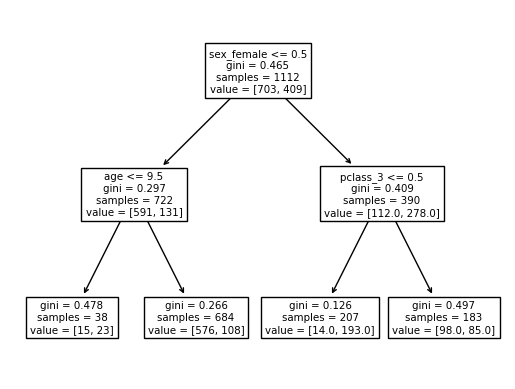

In [12]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

Daarna gaan we de data voorspellen en de confusion matrix maken.

In [13]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns={0: 'Predicted Survived'})
model_results_frame = pd.concat([y_test.reset_index()['survived'], predicted_df], axis=1)
model_results_frame

,survived,Predicted Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
192,0,0
193,1,0
194,0,0
195,0,0


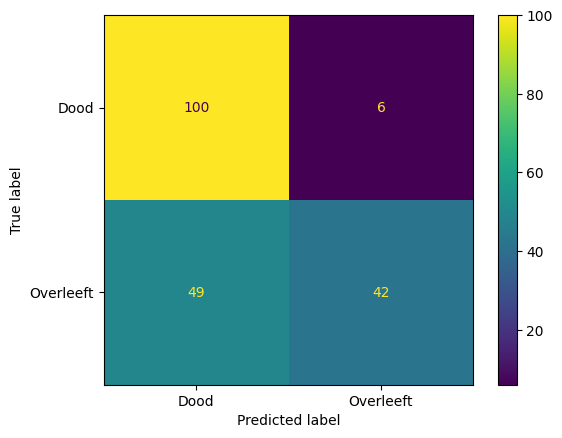

In [14]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['survived'], model_results_frame['Predicted Survived'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['Dood', 'Overleeft'])

cm_display.plot()
plt.show()

Nu moeten we nog de score berekenen van de classifier.

In [15]:
metrics.accuracy_score(model_results_frame['survived'], model_results_frame['Predicted Survived'])

0.7208121827411168

### Geen max depth
Maar omdat we zojuist een decision tree classifier van een max depth van 2 hebben gemaakt, gaan we nu een classifier maken met geen max depth.

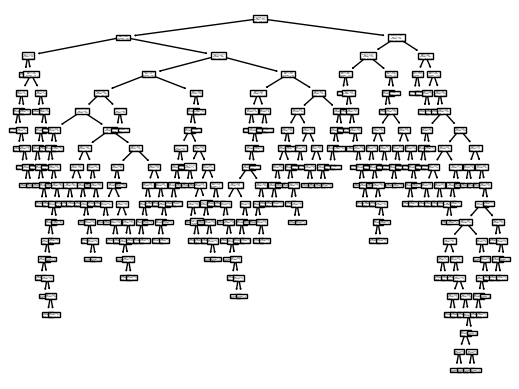

In [17]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

In [18]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns={0: 'Predicted Survived'})
model_results_frame = pd.concat([y_test.reset_index()['survived'], predicted_df], axis=1)
model_results_frame

,survived,Predicted Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
192,0,0
193,1,0
194,0,0
195,0,0


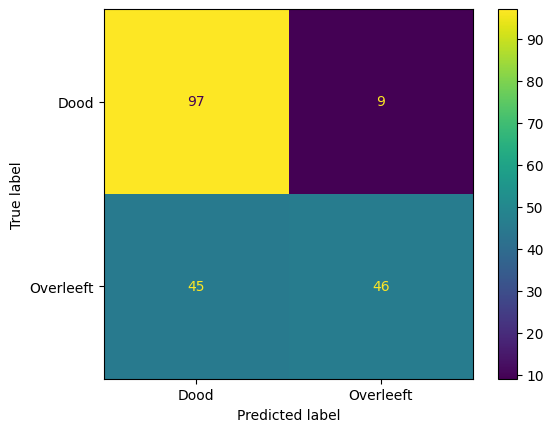

In [19]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['survived'], model_results_frame['Predicted Survived'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['Dood', 'Overleeft'])

cm_display.plot()
plt.show()

In [20]:
metrics.accuracy_score(model_results_frame['survived'], model_results_frame['Predicted Survived'])

0.7258883248730964